In [1]:
import os
import pandas as pd
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

## Input data fetching

We use the results from our previous examples (1 and 2), but you can use your own prepared GeoDataFrames

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
from blocksnet.models import City

city_model = City(
  blocks_gdf=aggregated_blocks, 
  matrix=accessibility_matrix, 
)

In [4]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
for service_type, gdf in services.items():
  city_model.update_layer(service_type, gdf)

Save city model to file so we can use it later

In [6]:
city_model.to_pickle(os.path.join(example_data_path, 'city_model.pickle'))

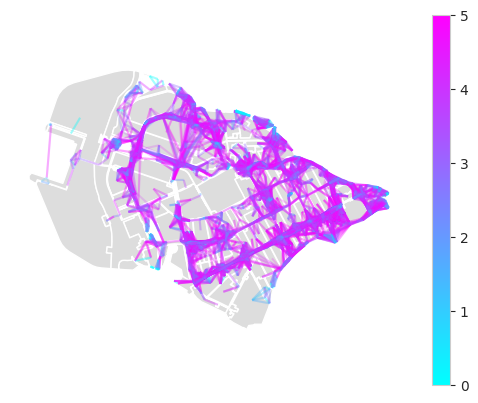

In [7]:
city_model.plot()

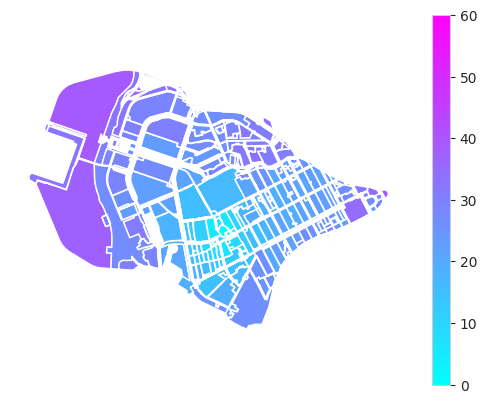

In [8]:
from blocksnet.method import Accessibility

acc = Accessibility(city_model=city_model)
acc.plot(acc.calculate(city_model[135]))

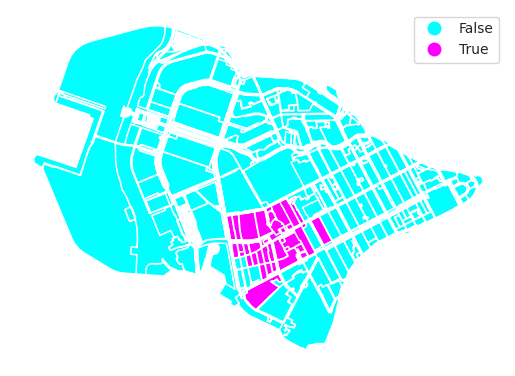

In [12]:
acc.plot(acc.calculate(city_model[135]), city_model['schools'])